# Test Notebook for TAFT
## Time alignment for tiles 

In [1]:
%cd ..

/home/maximilian/Github/melp


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from melp import Detector
import melp.taft

Welcome to JupyROOT 6.24/06


## Creating/Loading detector with misalignment

In [4]:
mu3e_detector = Detector.initFromROOT("./run42_20000.root")
#mu3e_detector = Detector.initFromSave("calibration_iteration3_v1.det")

------------------------------
Detector information

Stats:
  - Tiles:  5824
    -> misal:  True
  - Pixel Modules:  2844
  - Loaded Runs (Tiles):  []
  - Loaded Runs (Pixel):  []
------------------------------


In [5]:
melp.taft.select(mu3e_detector)

In [6]:
options={
    "ttree_loc": "alignment/mu3e", # "alignment/mu3e",
    "mc_primary": True,
    "tof": False
}
# /run/media/maximilian/Volume/Cosmics_Dev
#hist = melp.taft.station_station_timing('/run/media/maximilian/Volume/mu3e_sorted_000002_cosmic.root', mu3e_detector, **options)
#hist = melp.taft.station_station_timing('/home/maximilian/mu3e_sorted_000334.root', mu3e_detector, **options)
hist, tof = melp.taft.station_station_timing('/run/media/maximilian/Volume/Cosmics_Dev/merged_11_17.root', mu3e_detector, **options)

/home/maximilian/Github/melp/melp/taft/utils/cosmic.py:105: UserWarning: NOT WORKING
  warnings.warn("NOT WORKING")


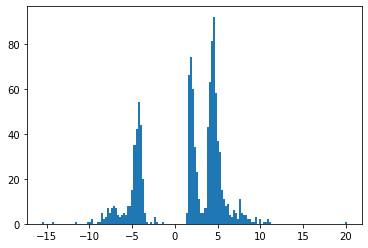

In [7]:
plt.hist(hist, bins=150)#, range=(-10.5,-9.5))
#plt.ylim(ymax = 10000, ymin = 0)
plt.show()

In [9]:
np.median(hist)

-6.333175470965216

In [16]:
def test_func(x, *args):
    a, b, c = args
    tmp_result = (np.exp(-(((x-a)/b) + np.exp(-((x-a)/b)))/2)) /c
    return tmp_result

def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def test_fit_func(x, *args):
    tmp = test_func(-x, *args[0:3])
    tmp += test_func(x, *(args[3], args[1], args[2]))
    return tmp

In [8]:
import scipy.optimize as opt

hist_1, bin_edges = np.histogram(hist, bins=150, range=(-20,0),  density=False)

bin_center = (bin_edges[1:] + bin_edges[:-1])/2
print(len(bin_center), "  |  ", len(bin_edges))

args = np.array([15, 1, 1, -5])
popt, cov = opt.curve_fit(test_fit_func, bin_center, hist_1, p0=args)
#popt, cov = opt.curve_fit(gauss_function, bin_center, hist_1)

print(popt)

150   |   151


NameError: name 'test_fit_func' is not defined

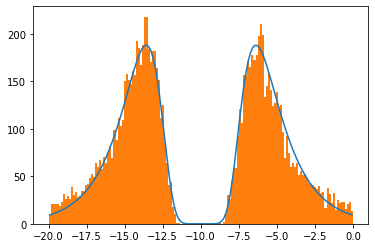

In [21]:

plt.plot(bin_center, test_fit_func(bin_center, *popt))
plt.hist(hist, bins=150, range=(-20,0), density = False)
plt.show()

In [22]:
print((popt[0]-popt[3])/2)
#popt[0]

9.97916165786929


In [30]:
print(mu3e_detector.TileDetector.tile[200000].pos[2]-mu3e_detector.TileDetector.tile[302856].pos[2])
print(mu3e_detector.TileDetector.tile[202856].pos[2]-mu3e_detector.TileDetector.tile[300000].pos[2])

-1133.83
-476.4100000000001


In [60]:
options_cal = {
    "debug_station": 1,
    "tof": "advanced_new",
    "dt_mode": "median", # median
    "overwrite": True,
    #"hist_file": "histo_2mio_frames_2.root"  # histogram file
    "hist_file": "/run/media/maximilian/Volume/merged.root"
}

In [7]:
melp.taft.calibrate(**options_cal)

Using  median
Calculating absolute timing offsets to master tile: 200000
Calculating absolute timing offsets to master tile: 300000
Calibration finished
Elapsed time: 32.7390 seconds


/home/maximilian/Github/melp/melp/taft/calibrate.py:438: UserWarning: Warning: deprecated
  warnings.warn("Warning: deprecated")
/home/maximilian/Github/melp/melp/taft/calibrate.py:374: UserWarning: Warning: deprecated
  warnings.warn("Warning: deprecated")


([array([-0.00504542]),
  array([-0.00423102]),
  array([-0.00472045]),
  array([-0.00407656]),
  array([-0.0045538]),
  array([-0.00412916]),
  array([-0.00372326]),
  array([-0.00399349]),
  array([-0.00386867]),
  array([-0.00379991]),
  array([-0.00382708]),
  array([-0.00335057]),
  array([-0.00409694]),
  array([-0.00400424]),
  array([-0.00402634]),
  array([-0.00409944]),
  array([-0.00397956]),
  array([-0.00406804]),
  array([-0.00451088]),
  array([-0.00485052]),
  array([-0.00502436]),
  array([-0.0048467]),
  array([-0.00476843]),
  array([-0.00433133]),
  array([-0.00535424]),
  array([-0.00576372]),
  array([-0.00535183]),
  array([-0.00528734]),
  array([-0.0050746]),
  array([-0.00525721]),
  array([-0.00503886]),
  array([-0.00419798]),
  array([-0.00448261]),
  array([-0.00382217]),
  array([-0.00331586]),
  array([-0.00328976]),
  array([-0.00357588]),
  array([-0.00318408]),
  array([-0.0026934]),
  array([-0.00299039]),
  array([-0.00367296]),
  array([-0.0037802]

In [28]:
options={
    "ttree_loc": "alignment/mu3e",
    "mc_primary": True,
    "tof": False,
    "station": 2
}


hist_z = melp.taft.cosmic_tof_correction("/run/media/maximilian/Volume/mu3e_sorted_000002_cosmic.root", mu3e_detector, **options)

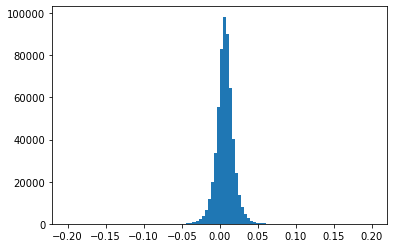

In [29]:
plt.hist(hist_z, bins=100, range=(-0.2,0.2))
plt.show()

In [42]:
print(np.mean(hist_z))

0.006627923710624855


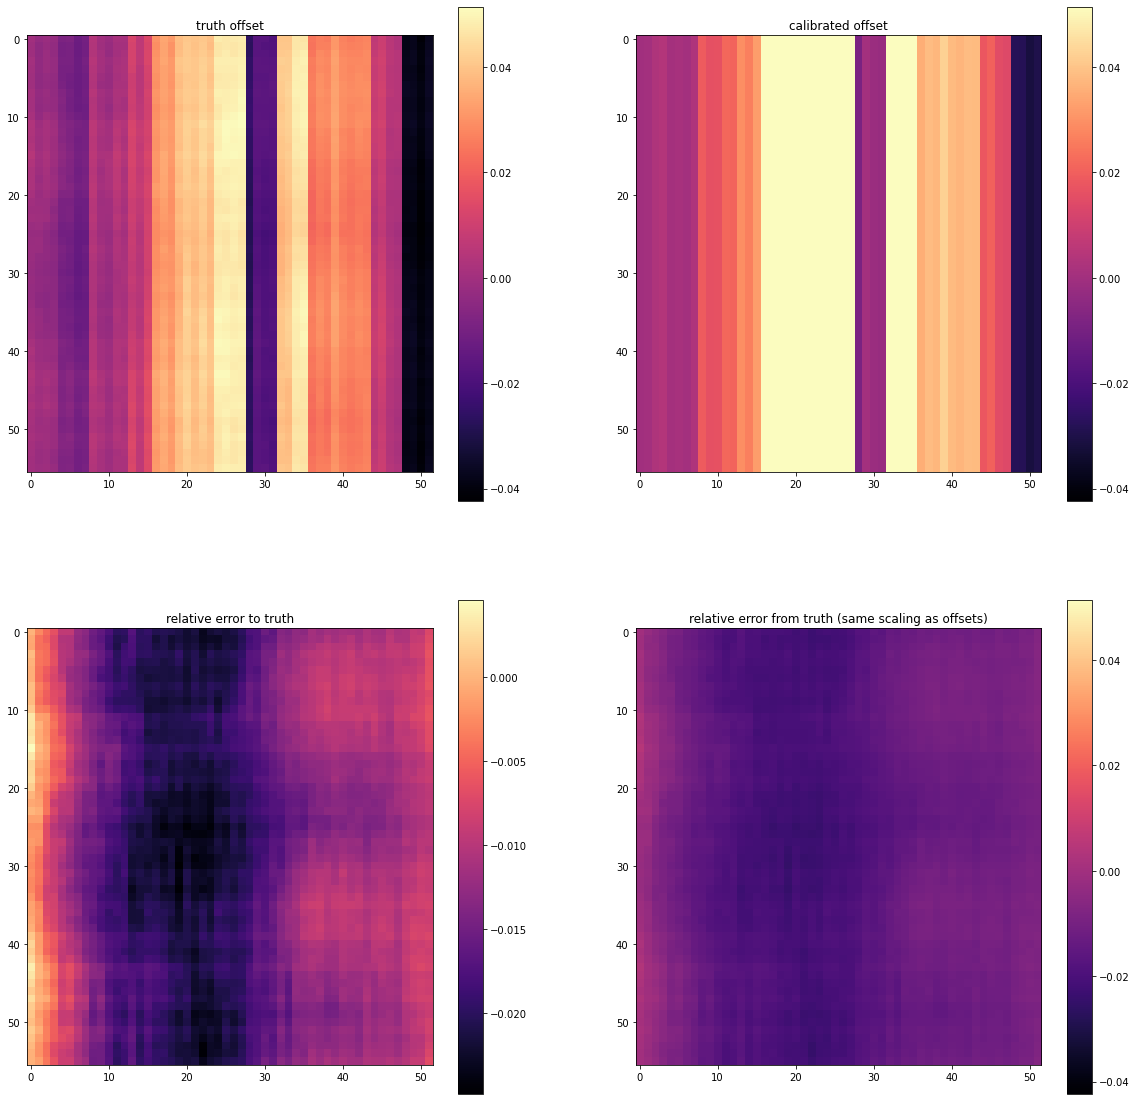

In [30]:
melp.taft.plot_station_calibration(mu3e_detector, 1)

In [4]:
for j in range(0, 55, 2):
    print(j)

0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
